For a circular orbit, we have $e = 0$. To find the semi-major axis $a$ as a function of time, we start with the expression for the time-averaged rate of change of $a$,
\begin{equation}
    \left\langle\frac{da}{dt}\right\rangle = - \frac{64G^3\mu M^2)}{5c^5a^3} f(e)
\end{equation}
where the function $f(e)$ is given by
\begin{equation}
    f(e) = \frac{1 + \frac{73}{24}e² + \frac{37}{96}e^4}{(1-e^2)^{7/2}}.
\end{equation}
Note that $f(0) = 1$ and since the eccentricity is fixed at zero, the time-averaged rate of change becomes the instantaneous rate of change,
\begin{equation}
    \frac{da}{dt} = - \frac{64G^3\mu M^2}{5c^5a^3}.
\end{equation}
This is a first-order separable differential equation for $a(t)$. We can solve it by separating the variables $a$ and $t$,
\begin{equation}
    a^3 \,da = - \frac{64G^3\mu M^2}{5c^5} \,dt,
\end{equation}
and the integrating
\begin{equation}
    \int_{a_0}^{a(t)} a'^3 \,da' = ∫_0^t - \frac{64G^3\mu M^2}{5c^5} \,dt' \\
    \implies \frac{1}{4}a(t)^4 - \frac{1}{4}a_0^4 = \frac{64G^3\mu M^2}{5c^5} t,\\
    \implies a(t) = \left(a_0^4 - \frac{256G^3\mu M^2}{5c^5} t\right)^{1/4}.
\end{equation}
This shows that the semi-major axis decreases over time as the binary system loses energy to gravitational waves, leading to an inspiral. The system will merge $a(t) \to 0$ at a time known as the coalescence time.


---

The WUMa eclipsing binary star system has $m_1 = 0.77M_{\odot}$ and $m_2 =
0.56M_{\odot}$, (the Sun has mass $M_{\odot} \approx 2 \times 10^{30} \mbox{ kg}$), with period $T = 0.33$ days. This determines the initial value of $a$ but not of $e$, so we consider the situation as a function of $e$.

The power radiated by the binary system is the rate of energy loss
\begin{equation}
    P(a, e) = -\left\langle\frac{dE}{dt}\right\rangle = \frac{32G^4μ^2M^3}{5c^5a^5)} f(e),
\end{equation}
where
\begin{equation}
    f(e) = \frac{1 + \frac{73}{24})e^2 + \frac{37}{96}e^4)}{(1-e^2)^{7/2}}.
\end{equation}
First, we must determine the semi-major axis $a$ from the given orbital period $T$ using Kepler's third law
\begin{equation}
    T^2 = \frac{4\pi^2a^3}{GM}.
\end{equation}

In [18]:
import numpy as np

# Physical constants in SI units
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 299792458     # Speed of light (m/s)
M_SUN = 1.989e30    # Mass of the Sun (kg)
L_SUN = 3.828e26    # Luminosity of the Sun (J/s)
AGE_UNIVERSE_YRS = 13.7e9 # Age of the universe in years

# WUMa system parameters
m1_solar = 0.77
m2_solar = 0.56
T_days = 0.33

# Convert parameters to SI units
m1 = m1_solar * M_SUN
m2 = m2_solar * M_SUN
T_sec = T_days * 24 * 3600  # Period in seconds

# Total mass (M) and reduced mass (mu)
M = m1 + m2
mu = (m1 * m2) / M

# Calculate semi-major axis 'a' using Kepler's Third Law
# T^2 = (4 * pi^2 * a^3) / (G * M)
a = ((G * M * T_sec**2) / (4 * np.pi**2))**(1/3)

print(f"Total Mass (M): {M/M_SUN:.2f} M_sun")
print(f"Reduced Mass (mu): {mu/M_SUN:.2f} M_sun")
print(f"Semi-major axis (a): {a/1e9:.3f} million km")

def f_e(e):
    '''
    Calculates the eccentricity function for radiated power.
    '''
    numerator = 1 + (73/24)*e**2 + (37/96)*e**4
    denominator = (1 - e**2)**(7/2)
    return numerator / denominator

def calculate_radiated_power(a_val, e_val):
    '''
    Calculates the gravitational power P = -<dE/dt>.
    '''
    f_val = f_e(e_val)
    prefactor = (32 * G**4 * mu**2 * M**3) / (5 * c**5 * a_val**5)
    return prefactor * f_val

eccentricities_power = [0.0, 0.5, 0.95]
for e_val in eccentricities_power:
    power = calculate_radiated_power(a, e_val)
    power_ratio_sun = power / L_SUN
    print(f"\nFor eccentricity e = {e_val:.2f}:")
    print(f"  Power = {power:.2e} J/s")
    print(f"  Ratio to Sun's output = {power_ratio_sun:.4f}")

Total Mass (M): 1.33 M_sun
Reduced Mass (mu): 0.32 M_sun
Semi-major axis (a): 1.538 million km

For eccentricity e = 0.00:
  Power = 4.70e+22 J/s
  Ratio to Sun's output = 0.0001

For eccentricity e = 0.50:
  Power = 2.29e+23 J/s
  Ratio to Sun's output = 0.0006

For eccentricity e = 0.95:
  Power = 6.59e+26 J/s
  Ratio to Sun's output = 1.7207


To find the time it takes for the semi-major axis a to decay to zero, we must solve the coupled differential equations for $\frac{da}{dt}$ and $\frac{de}{dt}$. We will do this by performing a numerical integration of the orbital decay.
For the special case $e=0$, a direct analytical solution exists from above, which we use for comparison,
\begin{equation}
    T_{e=0} = \frac{5c^5a_0^4}{256G^3\mu M^2}.
\end{equation}
We use the forward Euler method for $e > 0$.


Initial e    | Decay Time (Years)   | Ratio to Universe Age
------------------------------------------------------------
e0 = 0.00    | 6.24e+09             | 0.4558
e0 = 0.05    | 6.19e+09             | 0.4517
e0 = 0.10    | 6.02e+09             | 0.4395
e0 = 0.15    | 5.75e+09             | 0.4196
e0 = 0.20    | 5.38e+09             | 0.3930
e0 = 0.25    | 4.94e+09             | 0.3606
e0 = 0.30    | 4.44e+09             | 0.3240
e0 = 0.35    | 3.90e+09             | 0.2844
e0 = 0.40    | 3.33e+09             | 0.2434
e0 = 0.45    | 2.77e+09             | 0.2025
e0 = 0.50    | 2.23e+09             | 0.1631
e0 = 0.55    | 1.73e+09             | 0.1266
e0 = 0.60    | 1.29e+09             | 0.0939
e0 = 0.65    | 9.03e+08             | 0.0659
e0 = 0.70    | 5.90e+08             | 0.0431
e0 = 0.75    | 3.51e+08             | 0.0256
e0 = 0.80    | 1.82e+08             | 0.0133
e0 = 0.85    | 7.57e+07             | 0.0055
e0 = 0.90    | 2.12e+07             | 0.0015
e0 = 0.95    | 1.90e+06 

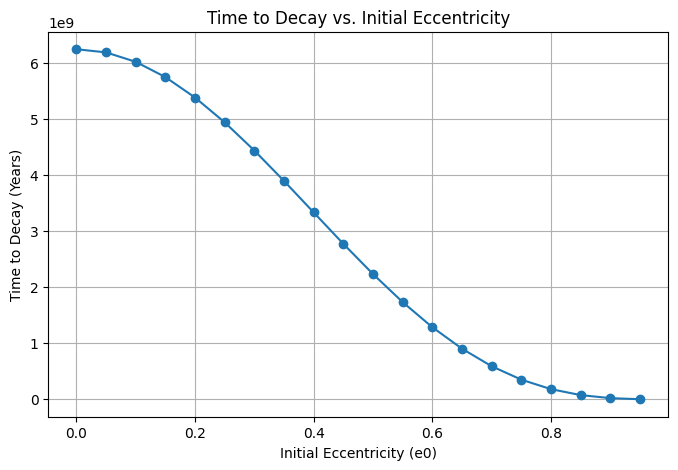

In [21]:
import matplotlib.pyplot as plt

def h_e(e):
    '''
    Calculates the eccentricity function for de/dt.
    '''
    if e == 0:
        return 0
    numerator = (1 + (121/304)*e**2) * e
    denominator = (1 - e**2)**(5/2)
    return numerator / denominator

def get_da_dt(a_val, e_val):
    '''
    Calculates da/dt.
    '''
    prefactor = -(64 * G**3 * mu * M**2) / (5 * c**5 * a_val**3)
    return prefactor * f_e(e_val)

def get_de_dt(a_val, e_val):
    '''
    Calculates de/dt.
    '''
    prefactor = -(304 * G**3 * mu * M**2) / (15 * c**5 * a_val**4)
    return prefactor * h_e(e_val)

def calculate_decay_time(e0):
    '''
    Calculates the time for 'a' to decay to zero for an initial eccentricity e0.
    '''
    # Use the analytical solution for the circular orbit case
    if e0 == 0.0:
        T_decay_sec = (5 * c**5 * a**4) / (256 * G**3 * mu * M**2)
        return T_decay_sec / (3600 * 24 * 365.25) # Convert to years

    # Numerical integration for e0 > 0
    current_a = a
    current_e = e0
    time_sec = 0

    # Set a time step. This is a trade-off between accuracy and speed.
    dt_sec = 100000 * 365.25 * 24 * 3600

    while current_a > 0:
        # Calculate rates of change based on current state
        da_dt = get_da_dt(current_a, current_e)
        de_dt = get_de_dt(current_a, current_e)

        # Update a, e, and time using Euler's method
        current_a += da_dt * dt_sec
        current_e += de_dt * dt_sec

        # Eccentricity should not become negative
        if current_e < 0:
            current_e = 0

        time_sec += dt_sec

    return time_sec / (3600 * 24 * 365.25) # Convert final time to years

initial_eccentricities = np.arange(0.00, 1.00, 0.05)
print(f"{'Initial e':<12} | {'Decay Time (Years)':<20} | {'Ratio to Universe Age'}")
print("-" * 60)

for e0 in initial_eccentricities:
    decay_time_yrs = calculate_decay_time(e0)
    age_ratio = decay_time_yrs / AGE_UNIVERSE_YRS
    print(f"e0 = {e0:<.2f}    | {decay_time_yrs:<20.2e} | {age_ratio:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(initial_eccentricities, [calculate_decay_time(e0) for e0 in initial_eccentricities], marker='o')
plt.xlabel('Initial Eccentricity (e0)')
plt.ylabel('Time to Decay (Years)')
plt.title('Time to Decay vs. Initial Eccentricity')
plt.grid(True)
plt.show()

The gravitational power radiated by the WUMa system is highly dependent on its (unknown) eccentricity. For a circular orbit, the power is an extremely low proportion of the Sun's electromagnetic output. As eccentricity increases, so does the power of radiation.

The time it will take for the two stars in the WUMa system to inspiral and merge also depends on the initial eccentricity. For a circular orbit, the decay time is a large proportion of the universe's current age. As the initial eccentricity increases, the decay time decreases dramatically. This is because highly eccentric orbits lose energy much faster when the stars are closest together (at periastron).

---

Hot Jupiters are a class of exoplanets with masses similar to Jupiter, but orbiting at $< 0.5 \mbox{ AU}$, where $1 \mbox{ AU} \approx 1.5 \times 10^{11} \mbox{m}$.

Initial e0   | Initial a0 (Solar Radii)     | Initial a0 (AU)
----------------------------------------------------------------------
e0 = 0.00    | 0.5464                       | 0.0026
e0 = 0.05    | 0.5467                       | 0.0026
e0 = 0.10    | 0.5505                       | 0.0026
e0 = 0.15    | 0.5569                       | 0.0026
e0 = 0.20    | 0.5662                       | 0.0026
e0 = 0.25    | 0.5785                       | 0.0027
e0 = 0.30    | 0.5944                       | 0.0028
e0 = 0.35    | 0.6142                       | 0.0029
e0 = 0.40    | 0.6387                       | 0.0030
e0 = 0.45    | 0.6689                       | 0.0031
e0 = 0.50    | 0.7061                       | 0.0033
e0 = 0.55    | 0.7526                       | 0.0035
e0 = 0.60    | 0.8111                       | 0.0038
e0 = 0.65    | 0.8864                       | 0.0041
e0 = 0.70    | 0.9861                       | 0.0046
e0 = 0.75    | 1.1237                       | 0.0052
e0 = 0.80    | 1.32

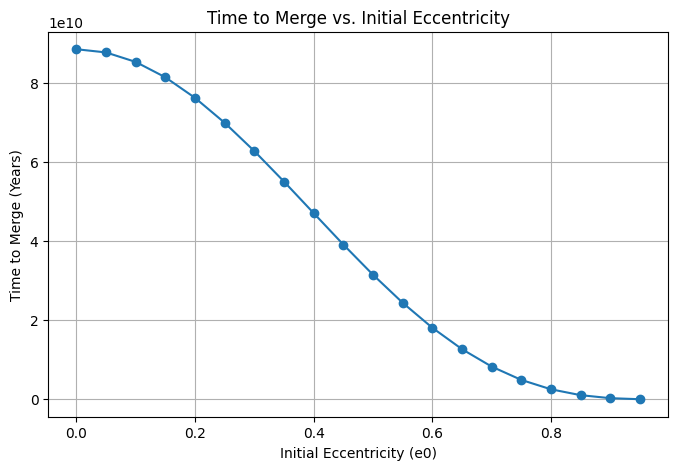

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants in SI units
G = 6.67430e-11      # Gravitational constant (m^3 kg^-1 s^-2)
c = 299792458         # Speed of light (m/s)
M_SUN = 1.989e30        # Mass of the Sun (kg)
R_SUN = 7e8           # Radius of the Sun (m)
AU = 1.5e11           # Astronomical Unit (m)
S_PER_YR = 365.25 * 24 * 3600 # Seconds per year

# Target inspiral time: Age of the Universe
T_UNIVERSE_YRS = 13.7e9
T_UNIVERSE_SEC = T_UNIVERSE_YRS * S_PER_YR

# Star-Planet system parameters
m1 = 1.0 * M_SUN   # Star mass
m2 = 0.001 * M_SUN # Planet mass (Jupiter-like)

# Derived properties
M = m1 + m2   # Total mass
mu = (m1 * m2) / M # Reduced mass

def f_e(e):
    '''
    Eccentricity function for power/da_dt.
    '''
    return (1 + (73/24)*e**2 + (37/96)*e**4) / (1 - e**2)**(7/2)

def h_e(e):
    '''
    Eccentricity function for de_dt.
    '''
    if e < 1e-9: return 0 # Avoid division by zero for e=0
    return e * (1 + (121/304)*e**2) / (1 - e**2)**(5/2)

def calculate_decay_time(a0, e0):
    '''
    Numerically integrates the orbital decay to find the total inspiral time.
    Takes initial semi-major axis (a0) and eccentricity (e0) as input.
    '''
    current_a = a0
    current_e = e0
    time_sec = 0

    # Use a dynamic time step for efficiency and stability
    # dt = 0.001 * (time for 'a' to change by 'a')
    while current_a > (0.01 * R_SUN): # Stop when it gets very close to the star
        da_dt = -(64/5) * (G**3 * mu * M**2) / (c**5 * current_a**3) * f_e(current_e)
        if da_dt == 0: return float('inf') # Avoid infinite loop if no decay

        # Heuristic time step
        dt_sec = 0.005 * abs(current_a / da_dt)

        de_dt = -(304/15) * (G**3 * mu * M**2) / (c**5 * current_a**4) * h_e(current_e)

        # Update parameters using Euler's method
        current_a += da_dt * dt_sec
        current_e += de_dt * dt_sec
        if current_e < 0: current_e = 0

        time_sec += dt_sec

    return time_sec

print(f"{'Initial e0':<12} | {'Initial a0 (Solar Radii)':<28} | {'Initial a0 (AU)'}")
print("-" * 70)

initial_eccentricities = np.arange(0.00, 1.00, 0.05)

for e0 in initial_eccentricities:
    # Use analytical solution for the circular case (e0 = 0)
    if e0 == 0.0:
        a0_4 = T_UNIVERSE_SEC * (256 * G**3 * mu * M**2) / (5 * c**5)
        a0 = a0_4**0.25
    else:
        # For eccentric cases, use an iterative solver to find a0
        # Start with a reasonable guess for a0
        a_guess = 0.1 * AU

        # Iterate to converge on the correct a0
        for _ in range(10):
            t_calc = calculate_decay_time(a_guess, e0)
            if t_calc == 0: t_calc = 1e-10 # Avoid division by zero
            # Update guess based on T ~ a^4 scaling
            ratio = T_UNIVERSE_SEC / t_calc
            a_guess = a_guess * (ratio**0.25)
        a0 = a_guess

    a0_in_R_sun = a0 / R_SUN
    a0_in_AU = a0 / AU
    print(f"e0 = {e0:<.2f}    | {a0_in_R_sun:<28.4f} | {a0_in_AU:.4f}")

# plot results
plt.figure(figsize=(8, 5))
plt.plot(initial_eccentricities, [calculate_decay_time(a0, e0) / T_UNIVERSE_YRS for e0 in initial_eccentricities], marker='o')
plt.xlabel('Initial Eccentricity (e0)')
plt.ylabel('Time to Merge (Years)')
plt.title('Time to Merge vs. Initial Eccentricity')
plt.grid(True)
plt.show()


The program calculates the initial orbital distance $a_0$ a Jupiter-mass planet would need to have to merge with its star in a time equal to the age of the universe. As eccentricity increases, the initial solar radius required decreases.

Jupiter-like planets are expected to form at distances of around $5 \mbox{AU}$. The calculated starting distances are orders of magnitude smaller than the typical formation distance of gas giants. A Jupiter-like planet forming at $5 \mbox{AU}$ would experience an incredibly weak gravitational wave emission due to the large separation and low-mass ratio. The time it would take for such a planet to inspiral and migrate to a "Hot Jupiter" location via gravitational radiation alone would be vastly longer than the age of the universe. Therefore, gravitational radiation is not a possible mechanism to explain the migration of Hot Jupiters from their formation region to their current close-in orbits.